In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats

In [28]:
bd = pd.read_csv('../Data/Bulk density/All_bulk_densities.csv')
bd['Water'] = [str(x)[1] for x in bd['Sample']]
bd['Nitrogen'] = [str(x)[2] for x in bd['Sample']]
bd_top = bd[bd['Depth'] < 16]
bd_mid = bd[bd['Depth'] == 76.20]
bd

,Sample,Depth,Date,Bulk density,Water,Nitrogen
0,114,7.00,2022,1.621383,1,4
1,114,22.00,2022,1.538319,1,4
2,114,60.00,2022,1.294292,1,4
3,114,105.00,2022,1.326496,1,4
4,221,7.00,2022,1.521712,2,1
5,221,22.00,2022,1.332329,2,1
6,221,60.00,2022,1.213458,2,1
7,221,105.00,2022,1.293510,2,1
8,116,15.24,2021,1.331830,1,6
9,116,45.72,2021,1.139133,1,6


In [9]:
bd.groupby('Water').mean()

,Sample,Depth,Date,Bulk density
Water,,,,
1,195.954545,46.225455,2021.181818,1.351531
2,221.000000,48.500000,2022.000000,1.340252


In [23]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return round(m, 2), round(m-h, 2), round(m+h, 2)

In [25]:
mean_confidence_interval(bd[bd['Water'] == '1']['Bulk density'].values)

(1.35, 1.3, 1.41)

In [26]:
mean_confidence_interval(bd[bd['Water'] == '2']['Bulk density'].values)

(1.34, 1.13, 1.55)

In [27]:
mean_confidence_interval(bd_top[bd_top['Water'] == '1']['Bulk density'].values)

(1.45, 1.33, 1.57)

In [29]:
mean_confidence_interval(bd_mid[bd_mid['Water'] == '1']['Bulk density'].values)

(1.31, 1.22, 1.39)

<AxesSubplot:xlabel='Depth', ylabel='Bulk density'>

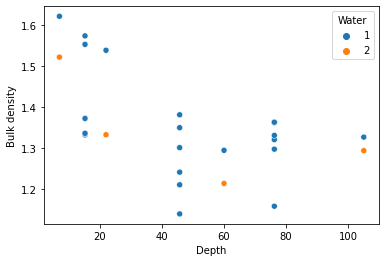

In [30]:
sns.scatterplot(x = 'Depth', y = 'Bulk density', hue = 'Water', data = bd)